# **Question 2.1) Deep CNN**

Instructions: *Build a deep CNN to classify the Fashion MNIST images. Provide a brief description of the architectural choices you’ve made: kernel sizes, strides, padding, network depth. Train your network end-to-end. Report on your model’s performance on training set and test set.*

**Below, I create a Deep CNN model with the following architecture:**

* Kernel size: 3x3
* Strides: 2x2
* Padding: No padding was applied so set set the padding to 'valid'. 
* Network depth: We apply a 2D convolutional layer with 32 filters, followed by another 2D convolutional layer with 64 filters. Then, we add a maxpooling layer, followed by dropout to prevent overfitting. After flattening, we add a Dense layer with 64 neurons, followed by Dropout. Finally, we add our final Dense output layer with 10 neurons that each corresponding to a class. 

In [0]:
#Import the packages we'll need. 
from keras.layers import Input, Dense, Conv2D, MaxPooling2D
from keras.layers import UpSampling2D, Dropout, Activation, Flatten
from keras.models import Model, Sequential
import tensorflow as tf
import keras
import numpy as np
from keras.utils import np_utils
%matplotlib inline
from matplotlib import pyplot as plt
from keras.datasets import fashion_mnist
from keras.callbacks import EarlyStopping 

**Load in the Fashion MNIST datasets for classification.**


In [0]:
#Load in the Fashion MNIST datasets for classification.
(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [0]:
print("X_train.shape:", X_train.shape)
print("X_test.shape:", X_test.shape)

X_train.shape: (60000, 28, 28)
X_test.shape: (10000, 28, 28)


In [0]:
#Reshape the images so that they're 28x28 and are using 1 channel, which is black and white.
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
print("X_train.shape:", X_train.shape)
print("X_test.shape:", X_test.shape)

X_train.shape: (60000, 28, 28, 1)
X_test.shape: (10000, 28, 28, 1)


In [0]:
#Normalize the images.
X_train /= 255
X_test /= 255

#One-hot encode the labels.
Y_train = np_utils.to_categorical(Y_train, 10)
Y_test = np_utils.to_categorical(Y_test, 10)

**Creating the Deep CNN model.**

In [0]:
#Creating the Deep CNN model.
cnn_model = Sequential()
cnn_model.add(Conv2D(filters = 32,kernel_size=(3, 3), activation='relu', strides=(2, 2), padding='valid', input_shape=(28,28,1)))
cnn_model.add(Conv2D(filters = 64,kernel_size=(3, 3), activation='relu', strides=(2, 2), padding='valid'))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))
cnn_model.add(Dropout(0.30))

cnn_model.add(Flatten())
cnn_model.add(Dense(64, activation='relu'))
cnn_model.add(Dropout(0.5))
cnn_model.add(Dense(10, activation='softmax')) #Adding the output layer, with 10 neurons for each of the 10 labels.

In [0]:
#Compiling the model using categorical cross entropy and momentum with the adam optimizer. 
cnn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
from keras.callbacks import TensorBoard
report = cnn_model.fit(X_train, Y_train, epochs = 50, shuffle = True, validation_data = (X_test, Y_test), batch_size = 128, callbacks = [TensorBoard(log_dir='/tmp/CNN_Image')] )


Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 5s 88us/step - loss: 0.8691 - acc: 0.6842 - val_loss: 0.4986 - val_acc: 0.8203
Epoch 2/50
60000/60000 [==============================] - 5s 87us/step - loss: 0.5721 - acc: 0.7940 - val_loss: 0.4324 - val_acc: 0.8390
Epoch 3/50
60000/60000 [==============================] - 5s 87us/step - loss: 0.5070 - acc: 0.8171 - val_loss: 0.4013 - val_acc: 0.8516
Epoch 4/50
60000/60000 [==============================] - 5s 87us/step - loss: 0.4698 - acc: 0.8298 - val_loss: 0.3816 - val_acc: 0.8603
Epoch 5/50
60000/60000 [==============================] - 5s 87us/step - loss: 0.4448 - acc: 0.8398 - val_loss: 0.3674 - val_acc: 0.8665
Epoch 6/50
60000/60000 [==============================] - 5s 88us/step - loss: 0.4259 - acc: 0.8449 - val_loss: 0.3504 - val_acc: 0.8724
Epoch 7/50
60000/60000 [==============================] - 5s 89us/step - loss: 0.4105 - acc: 0.8506 - val_loss: 0.3461 - val_acc

**Calculate the CNN model's accuracy and loss over the training and testing set.**

In [53]:
#Calculate the model's accuracy over the training and testing set. 
training_loss_accuracy = cnn_model.evaluate(X_train, Y_train, verbose=0)
print('Training Loss:', training_loss_accuracy[0])
print("Training accuracy:", training_loss_accuracy[1])

testing_loss_accuracy = cnn_model.evaluate(X_test, Y_test, verbose=0)
print('\nTesting Loss:', testing_loss_accuracy[0])
print("Testing accuracy:", testing_loss_accuracy[1])

Training Loss: 0.15990962920760116
Training accuracy: 0.94155

Testing Loss: 0.25359528139829635
Testing accuracy: 0.9073


**Plotting the visualization for the CNN model's accuracy and loss for the training and testing sets.**

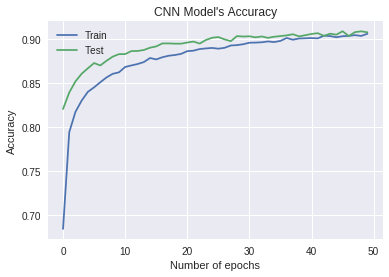

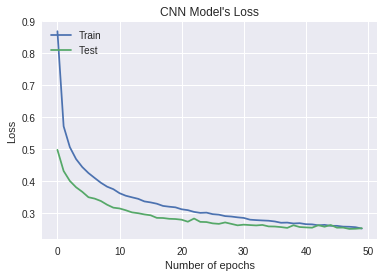

In [0]:
#Plot the visualization for the CNN model's accuracy 
#for the training and testing sets.
plt.plot(report.history['acc'])
plt.plot(report.history['val_acc'])
plt.title("CNN Model's Accuracy")
plt.ylabel('Accuracy')
plt.xlabel('Number of epochs')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

#Plot the visualization for the CNN model's loss 
#for the training and testing sets.
plt.plot(report.history['loss'])
plt.plot(report.history['val_loss'])
plt.title("CNN Model's Loss")
plt.ylabel('Loss')
plt.xlabel('Number of epochs')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# **Question 2.2) Transfer Learning**

Below, we apply transfer learning on the Fashion MNIST dataset. In particular, we will be using the pre-trained VGG16 
model, and will only be training on the final Dense layer. Instead of directly adding the weights to our new model, we
will remove the last fully connected layers from VGG16, and will create bottleneck features from our training and testing sets.
We will use these features in our new model, which will have one final dense layer. 

In [0]:
from keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.optimizers import RMSprop
from keras.callbacks import TensorBoard

from keras.layers import Input, Dense, Conv2D, MaxPooling2D
from keras.layers import UpSampling2D, Dropout, Activation, Flatten
from keras.models import Model, Sequential
from keras import backend as K
import tensorflow as tf
import keras
import numpy as np
from keras.utils import np_utils
%matplotlib inline
from matplotlib import pyplot as plt
from keras.datasets import fashion_mnist
from keras.callbacks import EarlyStopping 
import cv2
from keras.datasets import fashion_mnist


**Load in the Fashion MNIST dataset into our training and testing sets.**

In [0]:
#Load in the MNIST datasets for classification.
(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

#Encode labels in a one-hot-encoding format.
Y_train = np_utils.to_categorical(Y_train, 10)
Y_test = np_utils.to_categorical(Y_test, 10)


**Converting Fashion MNIST training set to RBG, and resizing images for VGG16. **

In [0]:
#Converting Fashion MNIST training set to RBG. Resize each image to be of size 48x48, which VGG16 expects. 
X_train = [cv2.cvtColor(cv2.resize(i, (48,48)), cv2.COLOR_GRAY2BGR) for i in X_train]
X_train = np.concatenate([arr[np.newaxis] for arr in X_train]).astype('float32')

X_test = [cv2.cvtColor(cv2.resize(i, (48,48)), cv2.COLOR_GRAY2BGR) for i in X_test]
X_test = np.concatenate([arr[np.newaxis] for arr in X_test]).astype('float32')

In [0]:
#base of VGG16.
conv_base = VGG16(weights="imagenet",include_top=False,input_shape=(48,48,3)) 
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 48, 48, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 48, 48, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 48, 48, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 24, 24, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 24, 24, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 24, 24, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 12, 12, 128)       0         
__________

**Create bottleneck features for the training and testing data. **


In [0]:
#create bottleneck features for the training and testing data.
training_features = conv_base.predict(np.array(X_train), batch_size= 16 , verbose=1)
testing_features = conv_base.predict(np.array(X_test), batch_size = 16, verbose=1)

10000/10000 [==============================] - 10s 1ms/step


In [0]:
print("training_features.shape:", training_features.shape)
print("testing_features:", testing_features.shape)

training_features.shape: (60000, 1, 1, 512)
testing_features: (10000, 1, 1, 512)


In [0]:
#Flatten and reshape the extracted training and testing features learned from VGG16 for our new model.
X_train_features = np.reshape(training_features, (training_features.shape[0], 512))
X_test_features = np.reshape(testing_features, (testing_features.shape[0], 512))

**Create the transfer learning model. **

In [0]:
#Creating a model from the bottleneck features, with only the final Dense layer. 
transfer_learning_model = Sequential()
transfer_learning_model.add(Dense(10, activation = 'softmax', input_dim = (512))) #Since Fashion MNIST has 10 classes, we will have 10 output neurons.

In [0]:
#Compile the transfer learning model using categorical crossentropy.
transfer_learning_model.compile(loss="categorical_crossentropy", optimizer=RMSprop(1e-4),metrics=["acc"])

In [0]:
#Fit the transfer learning model over 100 epochs.
from keras.callbacks import TensorBoard

report = transfer_learning_model.fit(X_train_features, Y_train, epochs = 100, shuffle = True, validation_data = (X_test_features, Y_test), batch_size = 128, callbacks = [TensorBoard(log_dir='/tmp/CNN_Transfer_Learning')] )


Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 3s 47us/step - loss: 6.7112 - acc: 0.3931 - val_loss: 3.7663 - val_acc: 0.5790
Epoch 2/100
60000/60000 [==============================] - 2s 39us/step - loss: 2.8894 - acc: 0.6548 - val_loss: 2.3969 - val_acc: 0.6939
Epoch 3/100
60000/60000 [==============================] - 2s 39us/step - loss: 1.9961 - acc: 0.7232 - val_loss: 1.8156 - val_acc: 0.7348
Epoch 4/100
60000/60000 [==============================] - 2s 38us/step - loss: 1.5442 - acc: 0.7542 - val_loss: 1.5094 - val_acc: 0.7553
Epoch 5/100
60000/60000 [==============================] - 2s 36us/step - loss: 1.2835 - acc: 0.7726 - val_loss: 1.3082 - val_acc: 0.7696
Epoch 6/100
60000/60000 [==============================] - 2s 36us/step - loss: 1.1069 - acc: 0.7861 - val_loss: 1.1520 - val_acc: 0.7770
Epoch 7/100
60000/60000 [==============================] - 2s 35us/step - loss: 0.9785 - acc: 0.7953 - val_loss: 1.0402 - 

**Calculate the transfer learning model's accuracy and loss over the bottleneck features of the testing set.**

In [0]:
#Calculate the model's accuracy over the bottleneck features of the testing set. 
training_loss_accuracy = transfer_learning_model.evaluate(X_train_features, Y_train, verbose=0)
print('Training Loss:', training_loss_accuracy[0])
print("Training accuracy:", training_loss_accuracy[1])

testing_loss_accuracy = transfer_learning_model.evaluate(X_test_features, Y_test, verbose=0)
print('\nTesting Loss:', testing_loss_accuracy[0])
print("Testing accuracy:", testing_loss_accuracy[1])

Training Loss: 0.3848395983715852
Training accuracy: 0.8701333333333333

Testing Loss: 0.5162077720880508
Testing accuracy: 0.8387


**Plotting the visualization for the transfer learning model's accuracy and loss for the training and testing sets.**

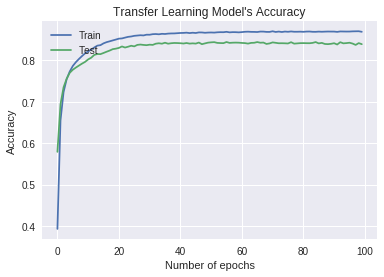

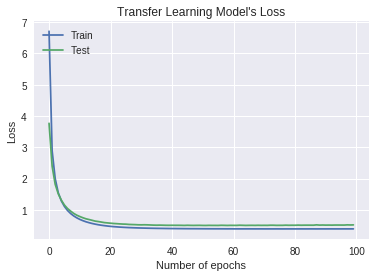

In [0]:
#Plot the visualization for the transfer learning model's accuracy 
#for the training and testing sets.
plt.plot(report.history['acc'])
plt.plot(report.history['val_acc'])
plt.title("Transfer Learning Model's Accuracy")
plt.ylabel('Accuracy')
plt.xlabel('Number of epochs')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

#Plot the visualization for the transfer learning model's loss 
#for the training and testing sets.
plt.plot(report.history['loss'])
plt.plot(report.history['val_loss'])
plt.title("Transfer Learning Model's Loss")
plt.ylabel('Loss')
plt.xlabel('Number of epochs')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()